In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import scipy
import scanpy as sc
import scvi

sc.set_figure_params(figsize=(4, 4))

## Embryoid body data

loading in one of the mtx files. will need to load all and add metadata.

In [2]:
eb_adata = sc.read_h5ad("/project2/gilad/jpopp/ebQTL/data/single_cell_objects/Lowpass.3seqbatches.merged.TEMP.h5ad")

In [3]:
eb_adata

AnnData object with n_obs × n_vars = 191179 × 36601
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'DROPLET.TYPE', 'SNG.POSTERIOR', 'NUM.SNPS', 'individual', 'percent.mt', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.0.8', 'seurat_clusters', 'FREE.TYPE', 'FREE.SNG.POSTERIOR', 'FREE.NUM.SNPS', 'free.individual', 'ALL.TYPE', 'ALL.SNG.POSTERIOR', 'ALL.NUM.SNPS', 'all.individual', 'c.date', 'Feeder.passage', 'Feeder.Free.passage', 'sex', 'Replicate', 'formation.date', 'visual.confluence', 'total.cells.per.lane..correct.', 'X..Viable..based.on.average.of.two.counts.', 'days.maintained.in.LD.prior.to.formation', 'who.dissociated.the.lines.for.formation', 'cell.counter.correction', 'comments', 'collection.date', 'EB.appearance.notes', 'dissociated.by.', 'approx..time.in.accumax..in.minutes.', 'Collection.Date', 'Lane', 'Sample.ID', 'cDNA.amp.cycles', 'cDNA.total.yield', 'library.prep.batch', 'Sequencing.batch', 'col.group'
    var: 'features'

In [4]:
eb_adata.obs

,orig.ident,nCount_RNA,nFeature_RNA,DROPLET.TYPE,SNG.POSTERIOR,NUM.SNPS,individual,percent.mt,nCount_SCT,nFeature_SCT,...,dissociated.by.,approx..time.in.accumax..in.minutes.,Collection.Date,Lane,Sample.ID,cDNA.amp.cycles,cDNA.total.yield,library.prep.batch,Sequencing.batch,col.group
1001_1_AAACCCACACGGCGTT-1,1001_1,7038.0,2107,SNG,1.0,924,18870,0.198920,8836.0,2103,...,5,35,2020-10-01,1,100120_1,11,50,1,1,100120
1001_1_AAACCCACAGAAGTGC-1,1001_1,26067.0,7179,SNG,1.0,3097,18870,2.485902,10615.0,4983,...,5,35,2020-10-01,1,100120_1,11,50,1,1,100120
1001_1_AAACGAAAGGTATTGA-1,1001_1,7699.0,3411,SNG,1.0,511,18870,6.078712,8532.0,3406,...,5,35,2020-10-01,1,100120_1,11,50,1,1,100120
1001_1_AAACGAAAGTAGATCA-1,1001_1,2952.0,1642,SNG,1.0,633,18913,6.504065,8429.0,2277,...,3,15,2020-10-01,1,100120_1,11,50,1,1,100120
1001_1_AAACGAACACCCTCTA-1,1001_1,1624.0,1153,SNG,1.0,265,19190,1.293103,7807.0,2514,...,3,25,2020-10-01,1,100120_1,11,50,1,1,100120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019_2_TTTGTTGCAGGGTCTC-1,1019_2,4959.0,2611,SNG,1.0,250,18522,1.028433,4804.0,2611,...,-2147483648,NA,2020-10-19,2,101920_2,11,97,4,3,101920
1019_2_TTTGTTGCAGTCAACT-1,1019_2,40411.0,7393,SNG,1.0,1801,18520,1.917795,5219.0,2457,...,5,35,2020-10-19,2,101920_2,11,97,4,3,101920
1019_2_TTTGTTGGTGAGATTA-1,1019_2,3087.0,1488,SNG,1.0,183,19140,0.000000,3837.0,1497,...,2,25,2020-10-19,2,101920_2,11,97,4,3,101920
1019_2_TTTGTTGTCATCCTGC-1,1019_2,3162.0,1842,SNG,1.0,188,18520,0.094877,3759.0,1848,...,5,35,2020-10-19,2,101920_2,11,97,4,3,101920


filter EB data

In [5]:
sc.pp.filter_cells(eb_adata, min_genes=200)
sc.pp.filter_genes(eb_adata, min_cells=3)
eb_adata.var['mt']=eb_adata.var_names.str.startswith('MT-')
sc.pp.calculate_qc_metrics(eb_adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
sc.pp.filter_cells(eb_adata, max_counts=75000)

In [6]:
eb_adata

AnnData object with n_obs × n_vars = 190860 × 34254
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'DROPLET.TYPE', 'SNG.POSTERIOR', 'NUM.SNPS', 'individual', 'percent.mt', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.0.8', 'seurat_clusters', 'FREE.TYPE', 'FREE.SNG.POSTERIOR', 'FREE.NUM.SNPS', 'free.individual', 'ALL.TYPE', 'ALL.SNG.POSTERIOR', 'ALL.NUM.SNPS', 'all.individual', 'c.date', 'Feeder.passage', 'Feeder.Free.passage', 'sex', 'Replicate', 'formation.date', 'visual.confluence', 'total.cells.per.lane..correct.', 'X..Viable..based.on.average.of.two.counts.', 'days.maintained.in.LD.prior.to.formation', 'who.dissociated.the.lines.for.formation', 'cell.counter.correction', 'comments', 'collection.date', 'EB.appearance.notes', 'dissociated.by.', 'approx..time.in.accumax..in.minutes.', 'Collection.Date', 'Lane', 'Sample.ID', 'cDNA.amp.cycles', 'cDNA.total.yield', 'library.prep.batch', 'Sequencing.batch', 'col.group', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt'

... storing 'orig.ident' as categorical
... storing 'DROPLET.TYPE' as categorical
... storing 'individual' as categorical
... storing 'SCT_snn_res.0.8' as categorical
... storing 'seurat_clusters' as categorical
... storing 'FREE.TYPE' as categorical
... storing 'ALL.TYPE' as categorical
... storing 'all.individual' as categorical
... storing 'c.date' as categorical
... storing 'who.dissociated.the.lines.for.formation' as categorical
... storing 'comments' as categorical
... storing 'approx..time.in.accumax..in.minutes.' as categorical
... storing 'Collection.Date' as categorical
... storing 'Sample.ID' as categorical
... storing 'library.prep.batch' as categorical
... storing 'col.group' as categorical


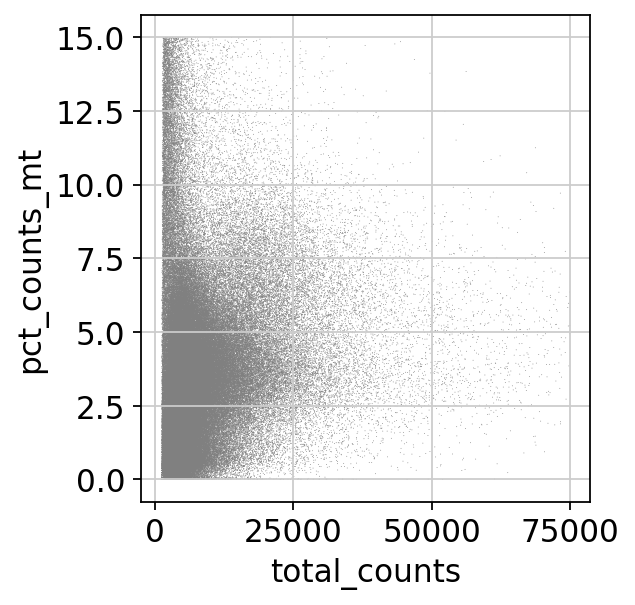

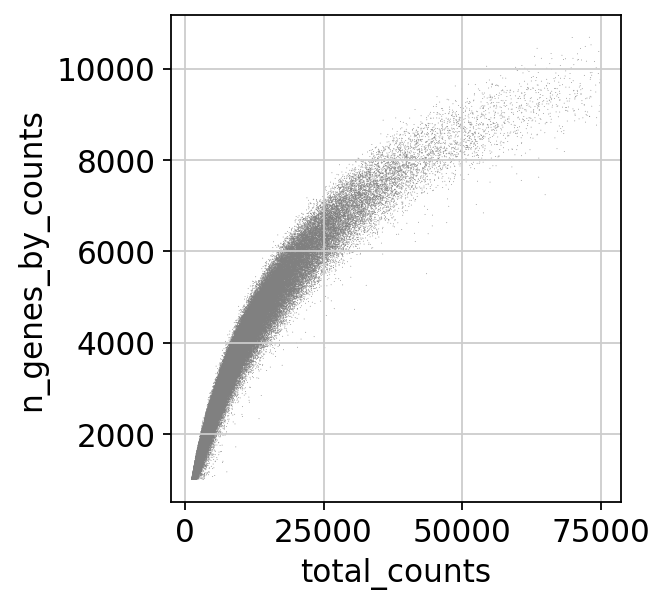

In [7]:
sc.pl.scatter(eb_adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(eb_adata, x='total_counts', y='n_genes_by_counts')

Remove single nuclei by filtering to cells with at least 1% mito

In [9]:
eb_adata = eb_adata[eb_adata.obs.pct_counts_mt > 1, :]
print(eb_adata.shape)

(165850, 34254)


In [10]:
eb_adata = eb_adata[eb_adata.obs.n_genes_by_counts > 1500, :]
print(eb_adata.shape)

(153869, 34254)


There's some bug for writing this kind of .h5ad file, found this fix at https://github.com/theislab/scvelo/issues/255

In [14]:
eb_adata.__dict__['_raw'].__dict__['_var'] = eb_adata.__dict__['_raw'].__dict__['_var'].rename(columns={'_index': 'features'})

In [15]:
eb_adata.write("/project2/gilad/jpopp/ebQTL/data/single_cell_objects/Lowpass.3seqbatches.merged.TEMP.filtered.h5ad")

## Fetal Cell Atlas Data

In [ ]:
#This is the full ref set, could use a subset
#Just protein coding, could include all

In [16]:
cao_adata = sc.read_h5ad("/project2/gilad/katie/ebQTL/CaoEtAl.Obj.CellsOfAllClusters.ProteinCodingGenes.h5ad")

In [17]:
cao_adata

AnnData object with n_obs × n_vars = 34588 × 20535
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Assay', 'Batch', 'Experiment_batch', 'Main_cluster_name', 'Fetus_id', 'Sex', 'nCount_SCT', 'nFeature_SCT'
    var: 'features'

... storing 'Assay' as categorical
... storing 'Batch' as categorical
... storing 'Experiment_batch' as categorical
... storing 'Main_cluster_name' as categorical
... storing 'Fetus_id' as categorical
... storing 'Sex' as categorical


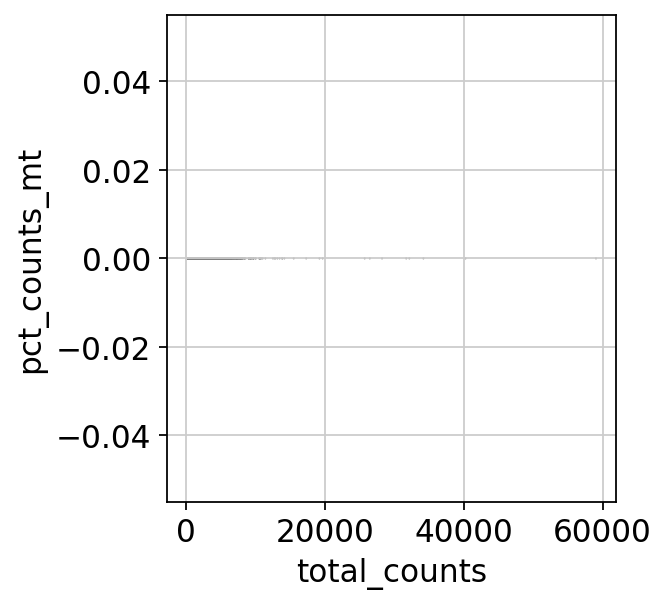

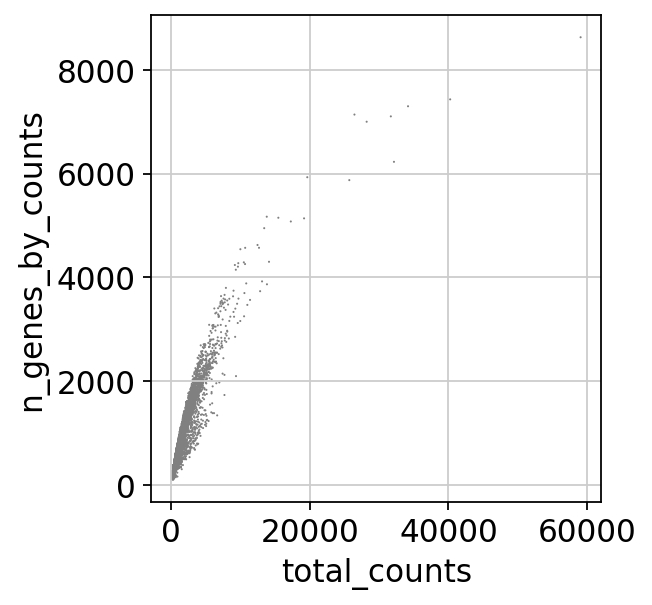

In [18]:
cao_adata.var['mt']=cao_adata.var_names.str.startswith('MT-')
sc.pp.calculate_qc_metrics(cao_adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
sc.pl.scatter(cao_adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(cao_adata, x='total_counts', y='n_genes_by_counts')

Keep in mind that we have filtered to only protein coding genes, so it's a pretty different gene set

In [19]:
cao_adata.obs['Collection.Date'] = '0'
cao_adata.obs['library.prep.batch'] = '0'

## Human embryonic stem cell reference

In [20]:
hesc_adata = sc.read_h5ad("/project2/gilad/katie/ebQTL/scHCL_hESC.h5ad")

In [21]:
hesc_adata.obs['Main_cluster_name'] = 'hESC'

In [22]:
hesc_adata.obs['Collection.Date'] = '0'
hesc_adata.obs['library.prep.batch'] = '0'

In [23]:
hesc_adata

AnnData object with n_obs × n_vars = 1660 × 18703
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Main_cluster_name', 'Collection.Date', 'library.prep.batch'
    var: 'features'

... storing 'Main_cluster_name' as categorical
... storing 'Collection.Date' as categorical
... storing 'library.prep.batch' as categorical


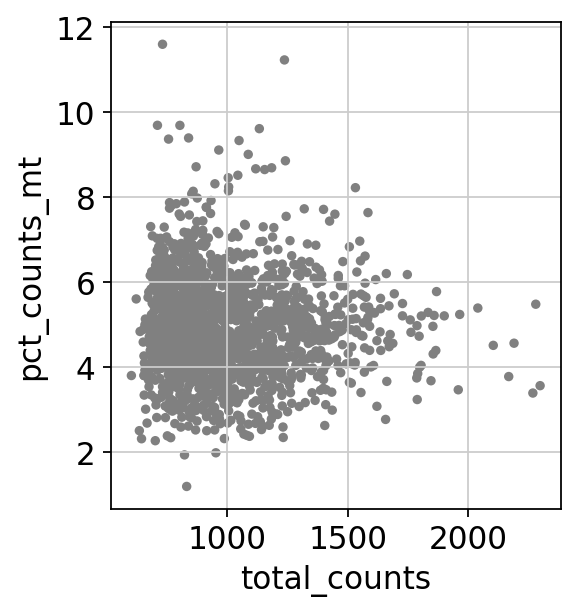

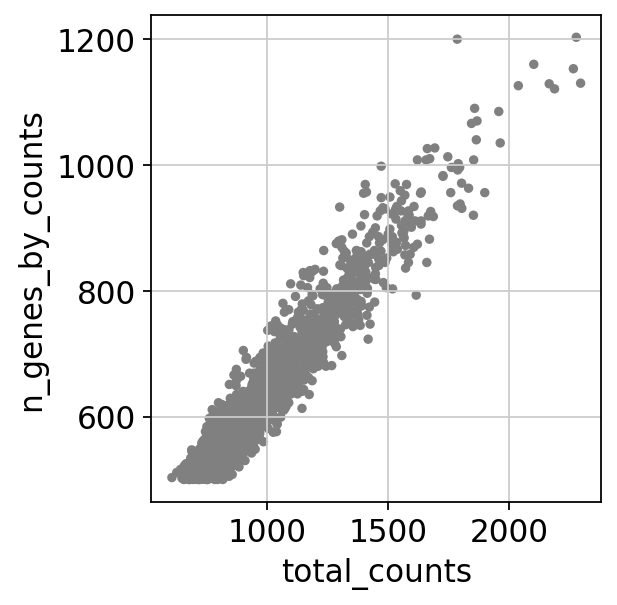

In [24]:
hesc_adata.var['mt']=hesc_adata.var_names.str.startswith('MT-')
sc.pp.calculate_qc_metrics(hesc_adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
sc.pl.scatter(hesc_adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(hesc_adata, x='total_counts', y='n_genes_by_counts')

In [45]:
adata = eb_adata.concatenate(cao_adata, join = 'outer', batch_key= 'source', fill_value= 0)

In [52]:
adata

AnnData object with n_obs × n_vars = 190117 × 23390
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'DROPLET.TYPE', 'SNG.POSTERIOR', 'NUM.SNPS', 'individual', 'percent.mt', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.0.8', 'seurat_clusters', 'FREE.TYPE', 'FREE.SNG.POSTERIOR', 'FREE.NUM.SNPS', 'free.individual', 'ALL.TYPE', 'ALL.SNG.POSTERIOR', 'ALL.NUM.SNPS', 'all.individual', 'c.date', 'Feeder.passage', 'Feeder.Free.passage', 'sex', 'Replicate', 'formation.date', 'visual.confluence', 'total.cells.per.lane..correct.', 'X..Viable..based.on.average.of.two.counts.', 'days.maintained.in.LD.prior.to.formation', 'who.dissociated.the.lines.for.formation', 'cell.counter.correction', 'comments', 'collection.date', 'EB.appearance.notes', 'dissociated.by.', 'approx..time.in.accumax..in.minutes.', 'Collection.Date', 'Lane', 'Sample.ID', 'cDNA.amp.cycles', 'cDNA.total.yield', 'library.prep.batch', 'Sequencing.batch', 'col.group', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt'

In [27]:
eb_adata.var_names

Index(['MIR1302-2HG', 'AL627309.1', 'AL627309.3', 'AL627309.5', 'AL627309.4',
       'AP006222.2', 'AL732372.1', 'AC114498.1', 'AL669831.2', 'LINC01409',
       ...
       'AC240274.1', 'AC213203.2', 'AC213203.1', 'AC004556.3', 'AC136352.3',
       'AC136616.1', 'AC023491.2', 'AC007325.1', 'AC007325.4', 'AC007325.2'],
      dtype='object', length=34254)

In [28]:
cao_adata.var_names

Index(['A1BG', 'A1CF', 'A2M', 'A2ML1', 'A3GALT2', 'A4GALT', 'A4GNT', 'AAAS',
       'AACS', 'AADAC',
       ...
       'ZWILCH', 'ZWINT', 'ZXDA', 'ZXDB', 'ZXDC', 'ZYG11A', 'ZYG11B', 'ZYX',
       'ZZEF1', 'ZZZ3'],
      dtype='object', length=20535)

In [30]:
len(set(eb_adata.var_names) & set(cao_adata.var_names))

17777

In [31]:
hesc_adata.var_names

Index(['A1BG-AS1', 'A2M-AS1', 'A2ML1', 'A4GALT', 'AAAS', 'AACS', 'AACSP1',
       'AADACL3', 'AADAT', 'AAED1',
       ...
       'ZW10', 'ZWILCH', 'ZWINT', 'ZXDB', 'ZXDC', 'ZYG11A', 'ZYG11B', 'ZYX',
       'ZZEF1', 'ZZZ3'],
      dtype='object', length=18703)

Check which genes are present in the intersection of just the EB data and the fetal cell atlas, then all three datasets

In [44]:
mgenes = ["NANOG", "POU5F1", "HAND1", "PAX6", "SOX17"]
for m in mgenes:
    print(m + " present - " + str(list(set(eb_adata.var_names) & set(cao_adata.var_names)).__contains__(m)))

NANOG present - True
POU5F1 present - True
HAND1 present - True
PAX6 present - True
SOX17 present - True


In [43]:
mgenes = ["NANOG", "POU5F1", "HAND1", "PAX6", "SOX17"]
for m in mgenes:
    print(m + " present - " + 
          str(list(set(eb_adata.var_names) & set(cao_adata.var_names) & set(hesc_adata.var_names)).__contains__(m)))

NANOG present - True
POU5F1 present - True
HAND1 present - False
PAX6 present - False
SOX17 present - False


Looks like hESC reference lacks some of the terminal marker genes - let's look at just using the fetal cell atlas as a reference, and only using genes that are shared between the two

In [54]:
adata = eb_adata.concatenate(cao_adata, join = 'inner', batch_key= 'source')

In [55]:
adata

AnnData object with n_obs × n_vars = 188457 × 17777
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'DROPLET.TYPE', 'SNG.POSTERIOR', 'NUM.SNPS', 'individual', 'percent.mt', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.0.8', 'seurat_clusters', 'FREE.TYPE', 'FREE.SNG.POSTERIOR', 'FREE.NUM.SNPS', 'free.individual', 'ALL.TYPE', 'ALL.SNG.POSTERIOR', 'ALL.NUM.SNPS', 'all.individual', 'c.date', 'Feeder.passage', 'Feeder.Free.passage', 'sex', 'Replicate', 'formation.date', 'visual.confluence', 'total.cells.per.lane..correct.', 'X..Viable..based.on.average.of.two.counts.', 'days.maintained.in.LD.prior.to.formation', 'who.dissociated.the.lines.for.formation', 'cell.counter.correction', 'comments', 'collection.date', 'EB.appearance.notes', 'dissociated.by.', 'approx..time.in.accumax..in.minutes.', 'Collection.Date', 'Lane', 'Sample.ID', 'cDNA.amp.cycles', 'cDNA.total.yield', 'library.prep.batch', 'Sequencing.batch', 'col.group', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt'

In [57]:
adata.obs['ref_group'] = adata.obs['source'].replace('0','EB').replace('1', 'FAC_ref').replace('2', 'hESC_ref')
adata.obs['ref_group'].value_counts()

EB         153869
FAC_ref     34588
Name: ref_group, dtype: int64

In [47]:
adata.obs['Main_cluster_name'].value_counts()

Hepatoblasts                                 500
Ganglion cells                               500
Trophoblast giant cells                      500
Smooth muscle cells                          500
Lymphoid cells                               500
                                            ... 
CSH1_CSH2 positive cells                     109
Corneal and conjunctival epithelial cells    104
CLC_IL5RA positive cells                     102
PDE1C_ACSM3 positive cells                    78
SLC26A4_PAEP positive cells                   68
Name: Main_cluster_name, Length: 77, dtype: int64

In [50]:
set(adata.obs['Main_cluster_name'])

{'AFP_ALB positive cells',
 'Acinar cells',
 'Adrenocortical cells',
 'Amacrine cells',
 'Antigen presenting cells',
 'Astrocytes',
 'Bipolar cells',
 'Bronchiolar and alveolar epithelial cells',
 'CCL19_CCL21 positive cells',
 'CLC_IL5RA positive cells',
 'CSH1_CSH2 positive cells',
 'Cardiomyocytes',
 'Chromaffin cells',
 'Ciliated epithelial cells',
 'Corneal and conjunctival epithelial cells',
 'Ductal cells',
 'ELF3_AGBL2 positive cells',
 'ENS glia',
 'ENS neurons',
 'Endocardial cells',
 'Epicardial fat cells',
 'Erythroblasts',
 'Excitatory neurons',
 'Extravillous trophoblasts',
 'Ganglion cells',
 'Goblet cells',
 'Granule neurons',
 'Hematopoietic stem cells',
 'Hepatoblasts',
 'Horizontal cells',
 'IGFBP1_DKK1 positive cells',
 'Inhibitory interneurons',
 'Inhibitory neurons',
 'Intestinal epithelial cells',
 'Islet endocrine cells',
 'Lens fibre cells',
 'Limbic system neurons',
 'Lymphatic endothelial cells',
 'Lymphoid cells',
 'MUC13_DMBT1 positive cells',
 'Megakaryocy

So, this really doesn't have any stem cells at all, and that's going to be a problem, let's add the hESCs back in, this time not subsetting to the intersection of genes

In [58]:
adata = adata.concatenate(hesc_adata, join = 'outer', batch_key= 'source', fill_value= 0)

In [59]:
adata.obs['source'].value_counts()

0    188457
1      1660
Name: source, dtype: int64

In [65]:
adata.obs['ref_group'] = adata.obs['ref_group'].fillna('hESC')
adata.obs['ref_group'].value_counts()

In [67]:
adata.obs['library.prep.batch'].value_counts()

2    49151
1    47029
3    46518
0    36248
4    11171
Name: library.prep.batch, dtype: int64

In [68]:
adata.obs['Main_cluster_name'].value_counts()

hESC                                         1660
Hepatoblasts                                  500
Stromal cells                                 500
Trophoblast giant cells                       500
Smooth muscle cells                           500
                                             ... 
CSH1_CSH2 positive cells                      109
Corneal and conjunctival epithelial cells     104
CLC_IL5RA positive cells                      102
PDE1C_ACSM3 positive cells                     78
SLC26A4_PAEP positive cells                    68
Name: Main_cluster_name, Length: 78, dtype: int64

In [69]:
adata.layers["counts"] = adata.X.copy()
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)
adata.raw = adata  # keep full dimension safe

In [100]:
sc.pp.highly_variable_genes(
    adata,
    flavor="seurat_v3",
    n_top_genes=5000,
    layer="counts",
    batch_key="ref_group",
    subset=True,
    span=1
)

/home/jpopp/.conda/envs/singlecell/lib/python3.8/site-packages/scanpy/preprocessing/_highly_variable_genes.py:144: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  df.loc[: int(n_top_genes), 'highly_variable'] = True


In [126]:
adata.write("/project2/gilad/jpopp/ebQTL/data/single_cell_objects/Lowpass.3seqbatches.merged_withref.TEMP.normalized.h5ad")

... storing 'DROPLET.TYPE' as categorical
... storing 'individual' as categorical
... storing 'SCT_snn_res.0.8' as categorical
... storing 'seurat_clusters' as categorical
... storing 'FREE.TYPE' as categorical
... storing 'ALL.TYPE' as categorical
... storing 'all.individual' as categorical
... storing 'c.date' as categorical
... storing 'who.dissociated.the.lines.for.formation' as categorical
... storing 'comments' as categorical
... storing 'approx..time.in.accumax..in.minutes.' as categorical
... storing 'Collection.Date' as categorical
... storing 'Sample.ID' as categorical
... storing 'library.prep.batch' as categorical
... storing 'col.group' as categorical
... storing 'Assay' as categorical
... storing 'Batch' as categorical
... storing 'Experiment_batch' as categorical
... storing 'Fetus_id' as categorical
... storing 'Sex' as categorical
... storing 'ref_group' as categorical
... storing 'features-0' as categorical
... storing 'features-1' as categorical
... storing 'features

## scVI

In [2]:
adata = sc.read_h5ad("/project2/gilad/jpopp/ebQTL/data/single_cell_objects/Lowpass.3seqbatches.merged_withref.TEMP.normalized.h5ad")

In [8]:
scvi.data.setup_anndata(adata, layer="counts", batch_key="ref_group",
                        categorical_covariate_keys=['Collection.Date', 'library.prep.batch'])

INFO     Using batches from adata.obs["ref_group"]                                           
INFO     No label_key inputted, assuming all cells have same label                           
INFO     Using data from adata.layers["counts"]                                              
INFO     Computing library size prior per batch                                              
INFO     Successfully registered anndata object containing 190117 cells, 5000 vars, 3        
         batches, 1 labels, and 0 proteins. Also registered 2 extra categorical covariates   
         and 0 extra continuous covariates.                                                  
INFO     Please do not further modify adata until model is trained.                          


In [9]:
vae = scvi.model.SCVI(adata, n_layers=2, n_latent=30,
                      dispersion='gene-batch',
                      gene_likelihood='nb')

In [10]:
vae

SCVI Model with the following params: 
n_hidden: 128, n_latent: 30, n_layers: 2, dropout_rate: 0.1, dispersion: gene-batch, 
gene_likelihood: nb, latent_distribution: normal
Training status: Not Trained

To print summary of associated AnnData, use: scvi.data.view_anndata_setup(model.adata)

In [11]:
vae.train()

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]
Set SLURM handle signals.


Epoch 42/42: 100%|██████████| 42/42 [12:28<00:00, 17.82s/it, loss=2.24e+03, v_num=1]


In [12]:
vae.save("/project2/gilad/jpopp/ebQTL/data/scvi_models/scvi_nb_20211012", save_anndata=True)

... storing 'orig.ident' as categorical
... storing 'mt-0' as categorical
... storing 'mt-1' as categorical
... storing 'mt-0' as categorical
... storing 'mt-1' as categorical


In [6]:
vae = scvi.model.SCVI.load("/project2/gilad/jpopp/ebQTL/data/scvi_models/scvi_nb_20211012")

INFO     Using data from adata.layers["counts"]                                              
INFO     Computing library size prior per batch                                              
INFO     Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels',     
         'cat_covs']                                                                         
INFO     Successfully registered anndata object containing 190117 cells, 5000 vars, 3        
         batches, 1 labels, and 0 proteins. Also registered 2 extra categorical covariates   
         and 0 extra continuous covariates.                                                  


In [14]:
adata.obsm["X_scVI"] = vae.get_latent_representation()

In [15]:
sc.pp.neighbors(adata, use_rep="X_scVI")
sc.tl.leiden(adata)
sc.tl.umap(adata)

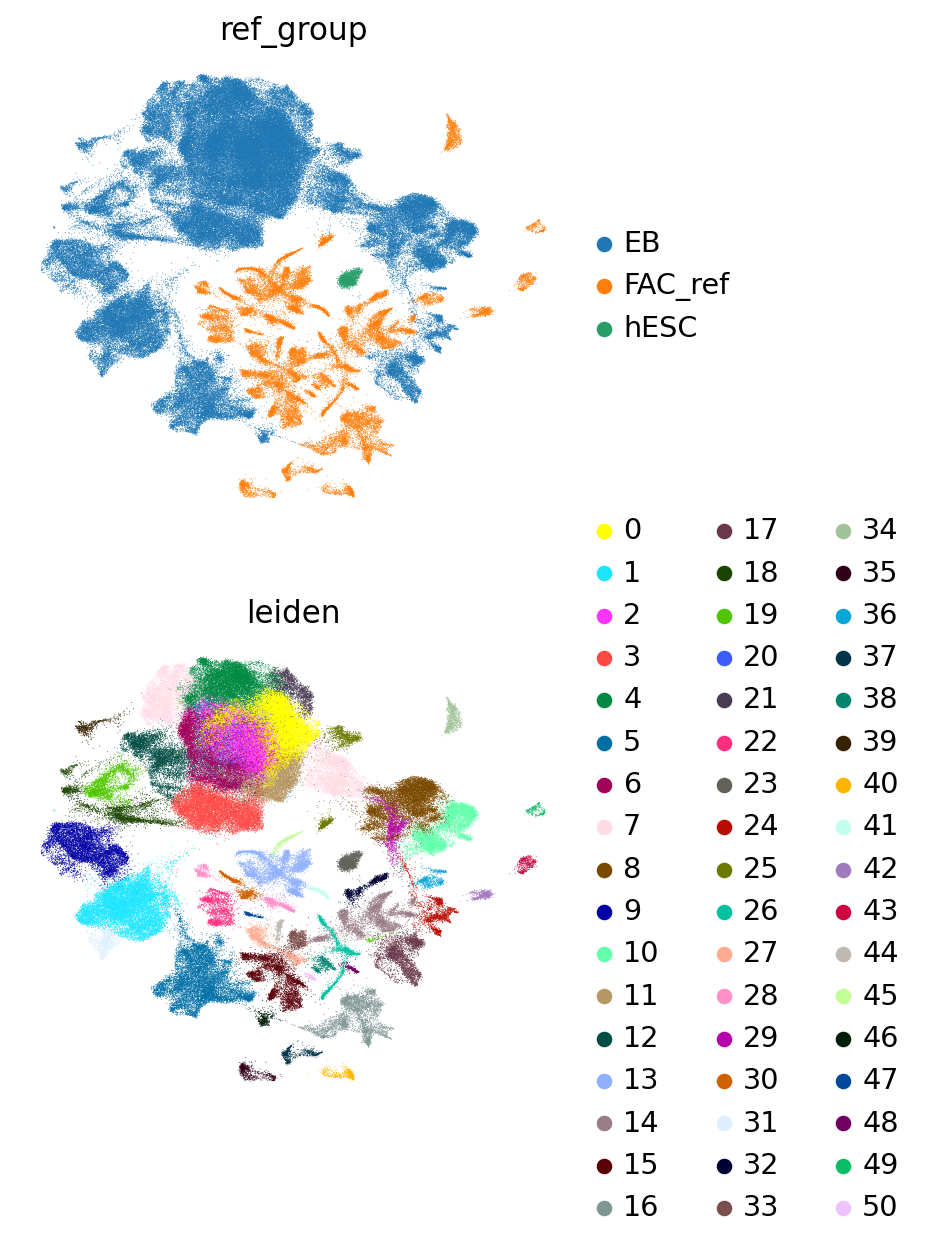

In [16]:
sc.pl.umap(
    adata,
    color=["ref_group", "leiden"],
    frameon=False,
    ncols=1
)

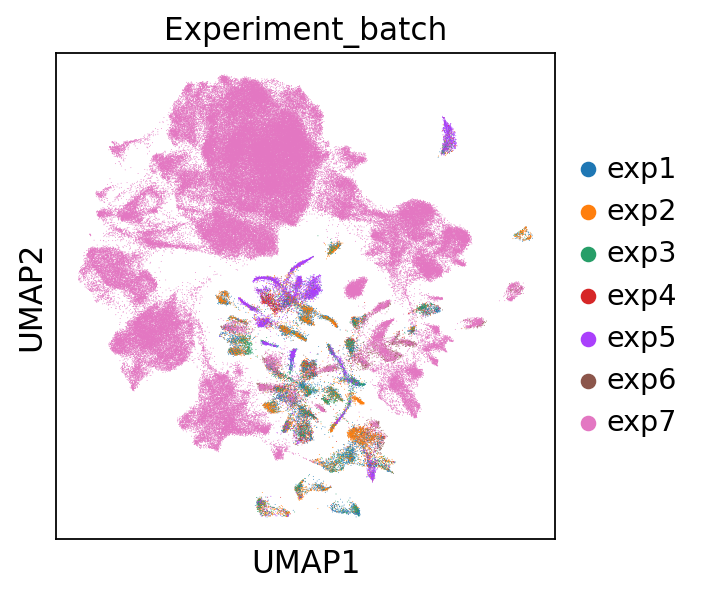

In [17]:
sc.pl.umap(
    adata,
    color=["Experiment_batch"]
)

This embedding suggests that we are not properly handling the differences between datasets

In [18]:
adata.write("/project2/gilad/jpopp/ebQTL/data/single_cell_objects/Lowpass.3seqbatches.merged_withref.TEMP.processed.h5ad")

## Library size differences

In [3]:
adata = sc.read_h5ad("/project2/gilad/jpopp/ebQTL/data/single_cell_objects/Lowpass.3seqbatches.merged_withref.TEMP.processed.h5ad")

Are the library size differences being properly considered?

In [9]:
adata.X = adata.layers['counts']

In [7]:
adata.obs['scvi_lib_factor'] = vae.get_latent_library_size()

In [10]:
sc.pp.normalize_total(adata, key_added='scanpy_lib_size')

For each group, obtain a library size factor by setting the mean of the library sizes (note that this is just across 5k genes) 
within each group to be 1

In [11]:
cdict = {}
for g in np.unique(adata.obs['ref_group']):
    n_g = np.sum(adata.obs['ref_group'] == g)
    sum_g =  np.sum(adata[adata.obs['ref_group']==g].obs['scanpy_lib_size'])
    cdict[g] = n_g / sum_g

In [12]:
adata.obs['scanpy_lib_factor'] = [cdict[g] for g in adata.obs['ref_group']] * adata.obs['scanpy_lib_size']

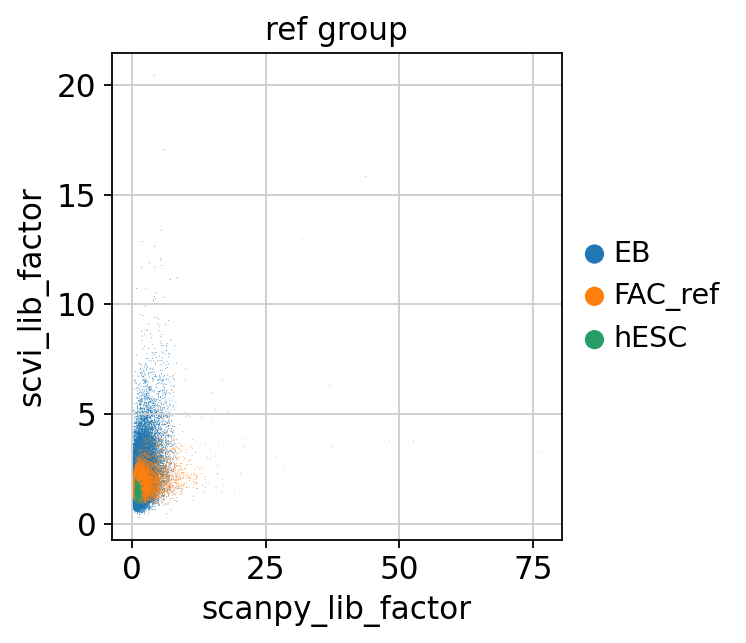

In [19]:
sc.pl.scatter(adata, x='scanpy_lib_factor', y='scvi_lib_factor', color='ref_group')

In [17]:
np.corrcoef(adata.obs['scanpy_lib_factor'], adata.obs['scvi_lib_factor'])

array([[1.        , 0.40643821],
       [0.40643821, 1.        ]])

## Comparing Datasets

In [41]:
#transferring annotations with scANVI

In [66]:
adata.obs["celltype_scanvi"] = 'Unknown'
refcells = adata.obs["source"] != '0'
adata.obs["celltype_scanvi"][refcells] = adata.obs.Main_cluster_name[refcells]

/tmp/jobs/13285374/ipykernel_7639/970421137.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adata.obs["celltype_scanvi"][refcells] = adata.obs.Main_cluster_name[refcells]


In [67]:
np.unique(adata.obs["celltype_scanvi"], return_counts = True)

(array(['AFP_ALB positive cells', 'Acinar cells', 'Adrenocortical cells',
        'Amacrine cells', 'Antigen presenting cells', 'Astrocytes',
        'Bipolar cells', 'Bronchiolar and alveolar epithelial cells',
        'CCL19_CCL21 positive cells', 'CLC_IL5RA positive cells',
        'CSH1_CSH2 positive cells', 'Cardiomyocytes', 'Chromaffin cells',
        'Ciliated epithelial cells',
        'Corneal and conjunctival epithelial cells', 'Ductal cells',
        'ELF3_AGBL2 positive cells', 'ENS glia', 'ENS neurons',
        'Endocardial cells', 'Epicardial fat cells', 'Erythroblasts',
        'Excitatory neurons', 'Extravillous trophoblasts',
        'Ganglion cells', 'Goblet cells', 'Granule neurons',
        'Hematopoietic stem cells', 'Hepatoblasts', 'Horizontal cells',
        'IGFBP1_DKK1 positive cells', 'Inhibitory interneurons',
        'Inhibitory neurons', 'Intestinal epithelial cells',
        'Islet endocrine cells', 'Lens fibre cells',
        'Limbic system neurons', 'Lym

In [68]:
scvi.data.setup_anndata(adata, layer="counts", batch_key= "source", labels_key= "celltype_scanvi",
                        categorical_covariate_keys=['Collection.Date', 'library.prep.batch'])
#include covariates here?

INFO     Using batches from adata.obs["source"]                                              
INFO     Using labels from adata.obs["celltype_scanvi"]                                      
INFO     Using data from adata.layers["counts"]                                              
INFO     Computing library size prior per batch                                              
INFO     Successfully registered anndata object containing 227108 cells, 41071 vars, 3       
         batches, 79 labels, and 0 proteins. Also registered 2 extra categorical covariates  
         and 0 extra continuous covariates.                                                  
INFO     Please do not further modify adata until model is trained.                          


In [69]:
lvae = scvi.model.SCANVI.from_scvi_model(vae, "Unknown", adata=adata,
                                        gene_likelihood="nb")

AttributeError: type object 'SCANVI' has no attribute 'from_scvi_model'

In [46]:
lvae.train(max_epochs=20)

INFO     Training for 7 epochs.                                                              


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Set SLURM handle signals.


Epoch 7/7: 100%|██████████| 7/7 [19:07<00:00, 163.91s/it, loss=7.97e+03, v_num=1]


In [47]:
adata.obs["C_scANVI"] = lvae.predict(adata)
adata.obsm["X_scANVI"] = lvae.get_latent_representation(adata)


In [48]:
sc.pp.neighbors(adata, use_rep="X_scANVI")
sc.tl.umap(adata)

/project2/gilad/katie/miniconda3/envs/scvi2/lib/python3.7/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'celltype_scanvi' as categorical
/project2/gilad/katie/miniconda3/envs/scvi2/lib/python3.7/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'C_scANVI' as categorical


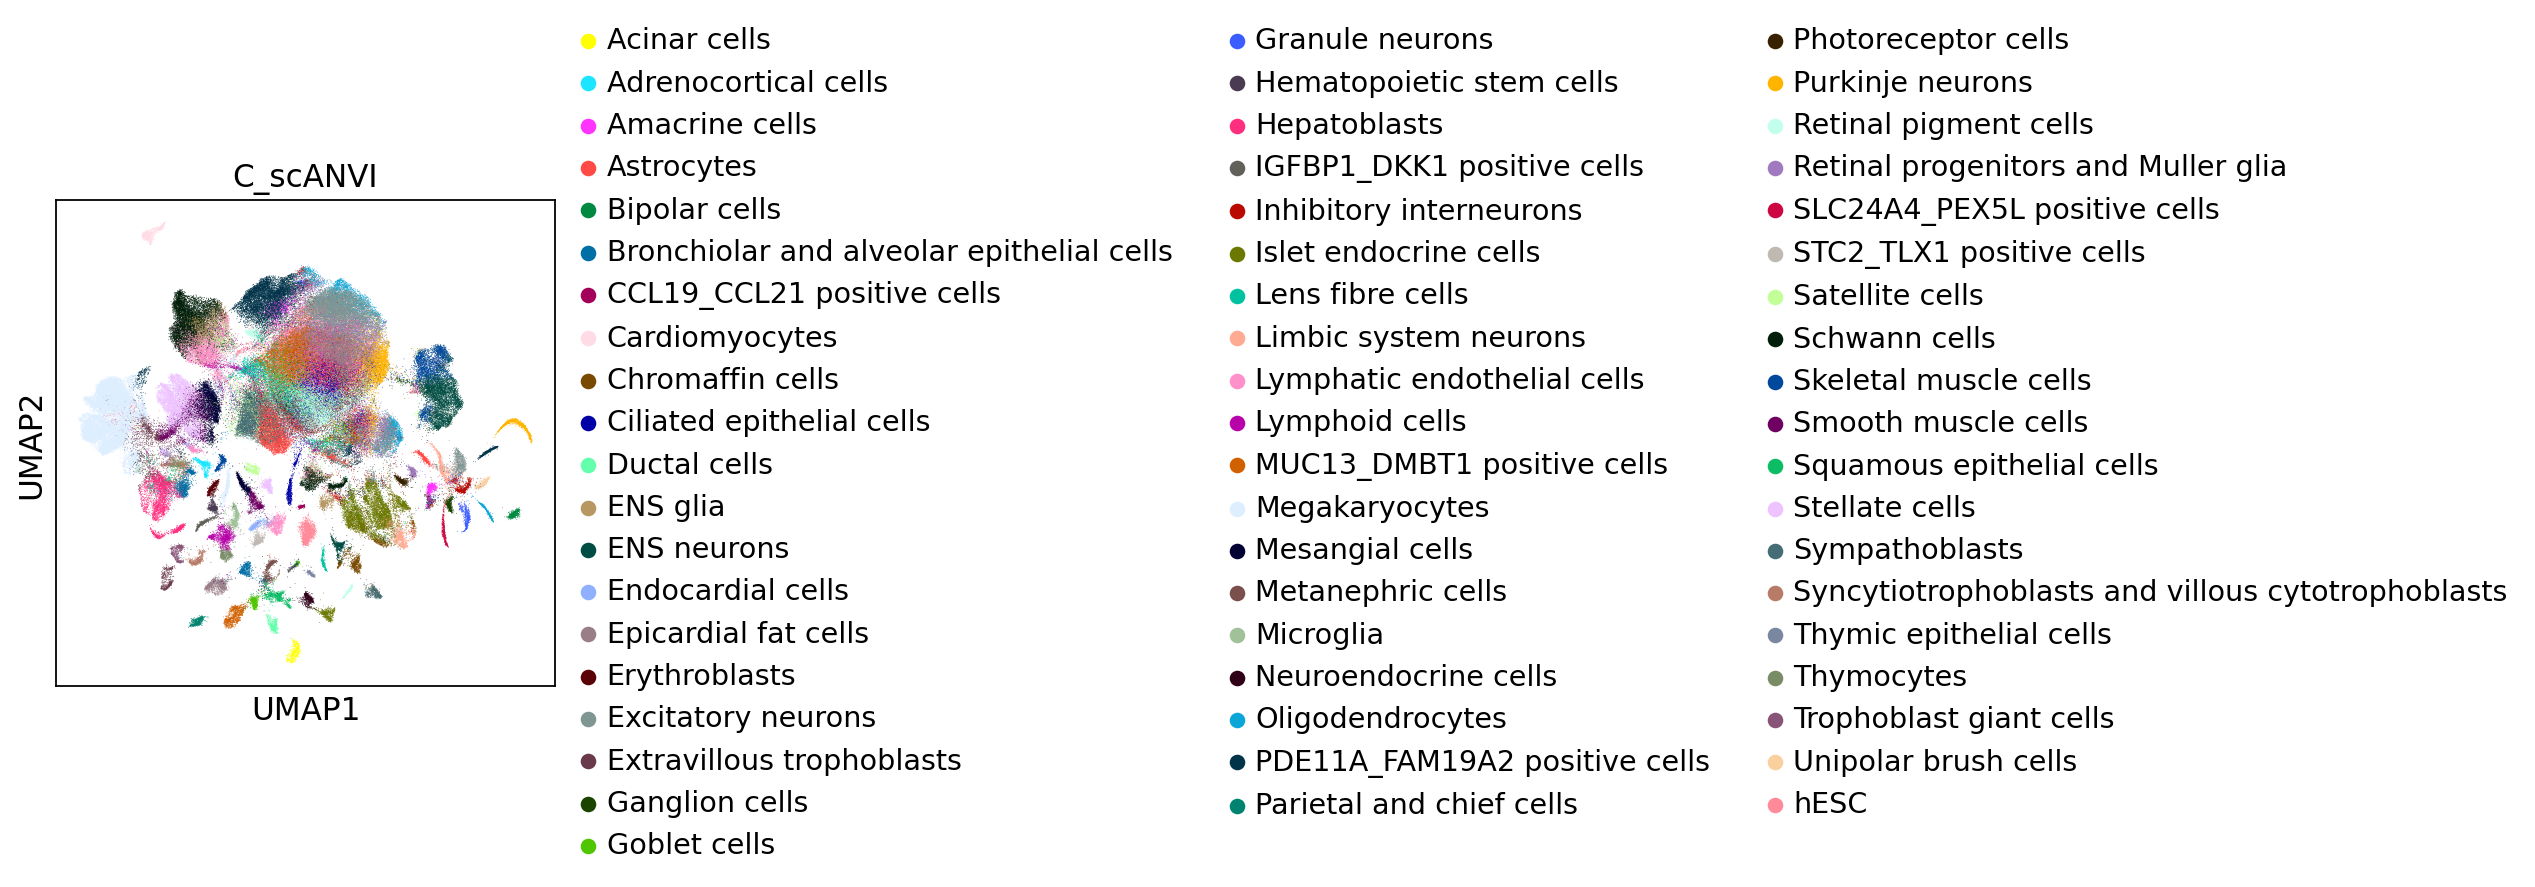

In [49]:
sc.pl.umap(adata, color="C_scANVI")

In [ ]:
sc.pl.umap(adata, color=["POU5F1", "AFP", "TNNT2", "MIXL1", "MAP2", "SOX10", "GNG11"], size=10)

In [ ]:
sc.set_figure_params(figsize=(20, 20))
sc.pl.umap(adata, color=['C_scANVI'], legend_loc= 'on data', legend_fontsize='small', legend_fontweight='normal', size=10)

In [ ]:
sc.pl.umap(adata, color=['C_scANVI'], groups=["hESC"], legend_loc= 'on data', legend_fontsize='small', legend_fontweight='normal', size=20)

In [ ]:
sc.pl.umap(adata, color=['C_scANVI'], groups=["Cardiomyocytes"], legend_loc= 'on data', legend_fontsize='small', legend_fontweight='normal', size=20)

In [ ]:
sc.pl.umap(adata, color=['source'], groups=["0"], legend_loc= 'on data', legend_fontsize='small', legend_fontweight='normal', size=10)

In [ ]:
sub_adata = adata[adata.obs.source == "0"]

In [ ]:
sub_adata

In [ ]:
sc.pl.umap(sub_adata, color=['C_scANVI'], legend_loc= 'on data', legend_fontsize='small', legend_fontweight='normal', size=20)

In [ ]:
sc.pl.umap(sub_adata, color=['C_scANVI'], groups=["Cardiomyocytes"], legend_loc= 'on data', legend_fontsize='small', legend_fontweight='normal', size=40)

In [ ]:
#Megakaryocyte annotation seems wrong,some others as well (ex: CMs in neuro blob)

In [ ]:
sub_adata.obs['C_scANVI'].value_counts()

In [ ]:
%matplotlib inline
tmp = pd.crosstab(sub_adata.obs['individual'],sub_adata.obs['C_scANVI'], normalize='index')
tmp.plot.bar(stacked=True, width=0.9, figsize=(6,4)).legend(bbox_to_anchor=(2.1,1.2), loc='upper right')

In [ ]:
#same thing, individual_replicate cluster proportion
ind = sub_adata.obs['individual'].astype(str)
rep = sub_adata.obs['Replicate'].astype(str)
sub_adata.obs['ind_rep'] = ind + "_" + rep
sub_adata.obs = sub_adata.obs.astype({"ind_rep":'category'})
tmp = pd.crosstab(sub_adata.obs['ind_rep'],sub_adata.obs['C_scANVI'], normalize='index')
tmp.plot.bar(stacked=True, width=0.9, figsize=(8,4)).legend(bbox_to_anchor=(2.5,1.1), loc='upper right')

In [ ]:
#create plot above but with germ layer, coarser annotations